# Problem 1

Using the graph presented in `Figure 1` as input, and assuming that the goal state is `11`, list the order in which the nodes will be visited (i.e., expanded) if they are generated in `ascending order`:

1. When using breadth-first search.
2. When using depth-first search.
3. When using iterative deepening depth-first search.

<p align="center">
  <img width="400" alt="figure1" src="./images/figure1.png"/>
</p>

As we can see is obvious that a solution exists, and the graph is a tree, so we can use the search algorithms to find the solution and the order in which the nodes will be visited.


# Main Objectives

The main objective of this problem is to understand the differences between the three search algorithms presented in the question. In particular, the goal is to understand how the order in which the nodes are generated can affect the performance of the search algorithms.

# Secondary Objectives

The secondary objectives are the following:

1. Compare the performance between the three search algorithms
2. Compare the performance of the 2 implementations of graph implementation (dictionary and networkx library)


# Libraries

For this purpose, the following libraries will be necessary:

-   **Networkx**: For efficient handling of graphs and/or trees
-   **Matplotlib**: To display both the problem and the results of the analysis
-   **Numpy**: For numerical analysis
-   **Pandas**: For handling large volumes of data

In the following cell, the necessary libraries will be imported.


# Dictionary-based Graph Representation

The first implementation of the graph will be a dictionary-based representation. In this implementation, the graph will be represented as a dictionary where the keys are the nodes and the values are the neighborsof the nodes. The following cell will present the implementation of the graph.


In the following cell, the graph will be implemented as a dictionary-based representation and the necessary
libraries will be imported.

Those libraries are:

-   **Deque**: For efficient handling of queues (Optional)
-   **List**: For handling lists of data (Optional)
-   **Optional**: For handling optional data (Optional)
-   **Dict**: For handling dictionaries of data
-   **Set**: For handling sets of data


In [179]:
from collections import deque
from typing import Dict, List, Optional, Set

For the implementation of the graph as a dictionary a function called `create_graph_dict` will be created. This function will return a dictionary where the keys are the nodes and the values are the neighbors of the nodes. The following cell will present the implementation of the graph.


In [180]:
def create_graph_dict() -> Dict[int, List[int]]:
    """Create a graph with predefined edges using a dictionary.

    Returns:
        Dict[int, List[int]]: A dictionary representing the graph.
    """
    edges: Dict[int, List[int]] = {
        1: [2, 3],
        2: [4, 5],
        3: [6, 7],
        4: [8, 9],
        5: [10, 11],
        6: [12, 13],
        7: [14, 15],

        # Add empty lists for nodes with no edges (leaf nodes)
        8: [],
        9: [],
        10: [],
        11: [],
        12: [],
        13: [],
        14: [],
        15: []
    }
    return edges

Then it will be necessary to implement the three search algorithms. The first algorithm to be implemented is the breadth-first search. The following cell will present the implementation of the breadth-first search algorithm. The function `bfs_dict` will receive the graph, the start node, and the goal node as input and will return the order in which the nodes were visited until the goal node was found.


In [181]:
def bfs_dict(
        graph: Dict[int, List[int]],
        start: int,
        goal: int
        ) -> List[int]:
    """
    Perform breadth-first search (BFS)
    using a dictionary-based graph representation.

    Args:
        graph (Dict[int, List[int]]): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.

    Returns:
        List[int]: The visited nodes in BFS order.
    """
    visited: Set[int] = set() # Reached nodes
    queue: deque[int] = deque([start]) # Frontier

    while queue:
        node: int = queue.popleft()

        if node not in visited:
            visited.add(node)

            if node == goal:
                break

            for neighbor in sorted(graph[node]): # Get neighbors in ascending order
                if neighbor not in visited:
                    queue.append(neighbor)

    return list(visited)

The second algorithm to be implemented is the depth-first search. The following cell will present the implementation
of the depth-first search algorithm. The function `dfs_dict` will receive the graph, the start node, and the goal
node as input and will return the order in which the nodes were visited until the goal node was found.


In [182]:
def dfs_dict(
        graph: Dict[int, List[int]],
        start: int,
        goal: int
        ) -> List[int]:
    """
    Perform depth-first search (DFS)
    using a dictionary-based graph representation.

    Args:
        graph (Dict[int, List[int]]): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.

    Returns:
        List[int]: The visited nodes in DFS order.
    """
    visited: Set[int] = set() # Reached nodes
    stack: List[int] = [start] # Frontier

    while stack:
        node: int = stack.pop()

        if node not in visited:
            visited.add(node)

            if node == goal:
                break

            for neighbor in sorted(graph[node], reverse=True):
                if neighbor not in visited:
                    stack.append(neighbor)

    return list(visited)

The third algorithm to be implemented is the iterative deepening depth-first search. The following cell will
present the implementation of the iterative deepening depth-first search algorithm. The function `ids_dict`
will receive the graph, the start node, the goal and the max depth permited as input and will return the order
in which the nodes were visited until the goal node was found.


In [183]:
def ids_dict(
        graph: Dict[int, List[int]],
        start: int,
        goal: int,
        max_depth: int
        ) -> Optional[List[int]]:
    """
    Perform iterative deepening search (IDS)
    using a dictionary-based graph representation.

    Args:
        graph (Dict[int, List[int]]): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.
        max_depth (int): The maximum depth to search.

    Returns:
        Optional[List[int]]: The visited nodes in IDS order, if found.
    """
    def dls_dict(node: int, depth: int) -> bool:
        """Depth-limited search helper function.

        Args:
            node (int): The current node.
            depth (int): The current depth limit.

        Returns:
            bool: True if the goal node is found, False otherwise.
        """
        if node not in visited:
            visited.add(node)

            if node == goal or depth == 0:
                return node == goal
            
            elif depth > 0:
                for neighbor in sorted(graph[node], reverse=True):
                    if dls_dict(neighbor, depth - 1):
                        return True
        return False

    for depth in range(max_depth + 1):

        visited: Set[int] = set()
        
        if dls_dict(start, depth):
            return list(visited)
        
    return None

We now need to test if the algorithms are working correctly. So we will run the three algorithms with the
graph presented in `Figure 1` and the goal state `11`.


In [184]:
def main_dict() -> None:
    """Main function to demonstrate dictionary-based graph search."""
    graph: Dict[int, List[int]] = create_graph_dict()
    start_node: int = 1
    goal_node: int = 11
    max_depth: int = 5

    bfs_visited: List[int] = bfs_dict(graph, start_node, goal_node)
    dfs_visited: List[int] = dfs_dict(graph, start_node, goal_node)
    ids_visited: List[int] = ids_dict(graph, start_node, goal_node, max_depth) or []

    print(f"BFS (Dictionary): {bfs_visited}")
    print(f"DFS (Dictionary): {dfs_visited}")
    print(f"IDS (Dictionary): {ids_visited}")

# Execute the main function
main_dict()

BFS (Dictionary): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
DFS (Dictionary): [1, 2, 4, 5, 8, 9, 10, 11]
IDS (Dictionary): [1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 15]


As we can appreciate the implementation of the three search algorithms are working correctly. And the order in which the nodes were visited is the following:

1. Breadth-first search: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
2. Depth-first search: 1, 2, 4, 8, 9, 5, 10, 11
3. Iterative deepening depth-first search: 1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 15

The behavior of the three search algorithms is as expected.


# Networkx-based Graph Representation

The second implementation of the graph will be a `networkx`-based representation. In this implementation, the graph will be represented as a networkx graph. The following cell will import the necessary libraries and present the implementation of the graph.


In [185]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from typing import List, Optional

The following cell defines a function called `create_graph_nx` that will be used to create the graph in `Figure 1`.


In [186]:
def create_graph_nx() -> nx.Graph:
    fig1 = nx.Graph()
    edges = [
        (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7),
        (4, 8), (4, 9), (5, 10), (5, 11), (6, 12), (6, 13), (7, 14), (7, 15)
    ]
    fig1.add_edges_from(edges)
    return fig1

For educational purposes, the graph will be plotted using the `networkx` and `matplotlib` libraries. But the following
function will not be used in the analysis of the problem.


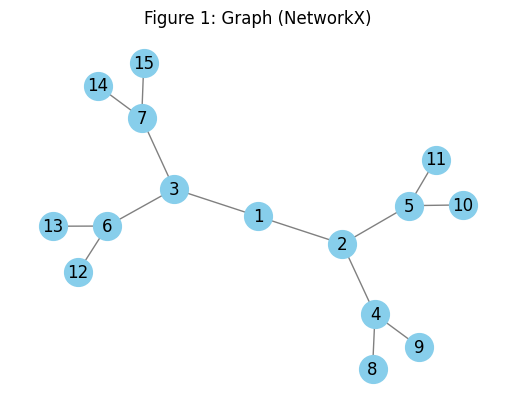

In [187]:
def plot_graph(graph: nx.Graph, title: Optional[str] = None):
    # background color should be white
    plt.figure()
    plt.title(title)
    pos = nx.spring_layout(graph)
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=400,
        node_color='skyblue',
        edge_color='gray'
        )
    plt.show()

g = create_graph_nx()
plot_graph(g, "Figure 1: Graph (NetworkX)")

As we can notice, the graph was correctly created and plotted. The graph is the same as the one presented in `Figure 1`. Now we need to implement the three search algorithms using the `networkx` graph representation.


The first algorithm to be implemented is the breadth-first search. The following cell will present the implementation of the breadth-first search algorithm. The function `bfs_nx` will receive the graph, the start node, and the goal node as input and will return the order in which the nodes were visited until the goal node was found.


In [188]:
def bfs_nx(graph: nx.Graph, start: int, goal: int) -> List[int]:
    """Perform breadth-first search (BFS) on a graph.

    Args:
        graph (nx.Graph): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.

    Returns:
        List[int]: The visited nodes in BFS order.
    """
    visited: List[int] = [] # Reached nodes
    queue: deque = deque([start]) # Frontier

    while queue:
        node = queue.popleft()

        if node not in visited:
            visited.append(node)

            if node == goal:
                break

            neighbors = sorted(list(graph.neighbors(node)))
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)
    return visited

Then it will be necessary to implement the depth-first search algorithm. The following cell will present the implementation of the depth-first search algorithm. The function `dfs_nx` will receive the graph, the start node, and the goal node as input and will return the order in which the nodes were visited until the goal node was found.


In [189]:
def dfs_nx(graph: nx.Graph, start: int, goal: int) -> List[int]:
    """Perform depth-first search (DFS) on a graph.

    Args:
        graph (nx.Graph): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.

    Returns:
        List[int]: The visited nodes in DFS order.
    """
    visited: List[int] = [] 
    stack: List[int] = [start] 

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            neighbors = sorted(list(graph.neighbors(node)), reverse=True)
            for neighbor in neighbors:
                if neighbor not in visited:
                    stack.append(neighbor)
    return visited

The third algorithm to be implemented is the iterative deepening depth-first search. The following cell will present the implementation of the iterative deepening depth-first search algorithm. The function `ids_nx` will receive the graph, the start node, the goal and the max depth permited as input and will return the order in which the nodes were visited until the goal node was found.


In [190]:
def ids_nx(graph: nx.Graph, start: int, goal: int, max_depth: int) -> Optional[List[int]]:
    """Perform iterative deepening search (IDS) on a graph.

    Args:
        graph (nx.Graph): The graph to search.
        start (int): The starting node.
        goal (int): The goal node.
        max_depth (int): The maximum depth limit.

    Returns:
        Optional[List[int]]: The visited nodes in IDS order, if the goal is found.
    """
    def dls(node: int, depth: int) -> bool:
        """Depth-limited search.

        Args:
            node (int): The current node.
            depth (int): The current depth limit.

        Returns:
            bool: Whether the goal was found within the depth limit.
        """
        if node not in visited:
            visited.append(node)
            if node == goal or depth == 0:
                return node == goal
            elif depth > 0:
                neighbors = sorted(list(graph.neighbors(node)), reverse=True)
                for neighbor in neighbors:
                    if dls(neighbor, depth - 1):
                        return True
        return False

    for depth in range(max_depth + 1):
        visited = []
        if dls(start, depth):
            return visited
    return None

For educational purposes, the graph will be plotted using the `networkx` and `matplotlib` libraries. For this purpose, the function `plot_graph_nx` will be created. The following cell will present the implementation of the function.


In [191]:
def plot_graph_nx(
    G: nx.Graph,
    bfs_visited: List[int],
    dfs_visited: List[int],
    ids_visited: List[int]
    ) -> None:
    """
    Plot the graph using NetworkX library and highlight the visited nodes
    for BFS, DFS, and IDS algorithms.

    Parameters:
    - G (nx.Graph): The input graph.
    - bfs_visited (List[int]): List of nodes visited by BFS algorithm.
    - dfs_visited (List[int]): List of nodes visited by DFS algorithm.
    - ids_visited (List[int]): List of nodes visited by IDS algorithm.

    Returns:
    None
    """
    
    _, axes = plt.subplots(1, 3, figsize=(18, 5))

    # BFS
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, 
        node_color=['skyblue' if node in bfs_visited else 'tan' for node in G.nodes], 
        ax=axes[0])
    axes[0].set_title("BFS")

    # DFS
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, 
        node_color=['skyblue' if node in dfs_visited else 'tan' for node in G.nodes], 
        ax=axes[1])
    axes[1].set_title("DFS")

    # IDS
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, 
        node_color=['skyblue' if node in ids_visited else 'tan' for node in G.nodes], 
        ax=axes[2])
    axes[2].set_title("IDS")

    plt.tight_layout()
    plt.show()

Finally we need to test if the algorithms are working correctly. So we will run the three algorithms with the graph presented in `Figure 1` and the goal state `11`.


BFS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
DFS: [1, 2, 4, 8, 9, 5, 10, 11]
IDS: [1, 3, 7, 15, 14, 6, 13, 12, 2, 5, 11]


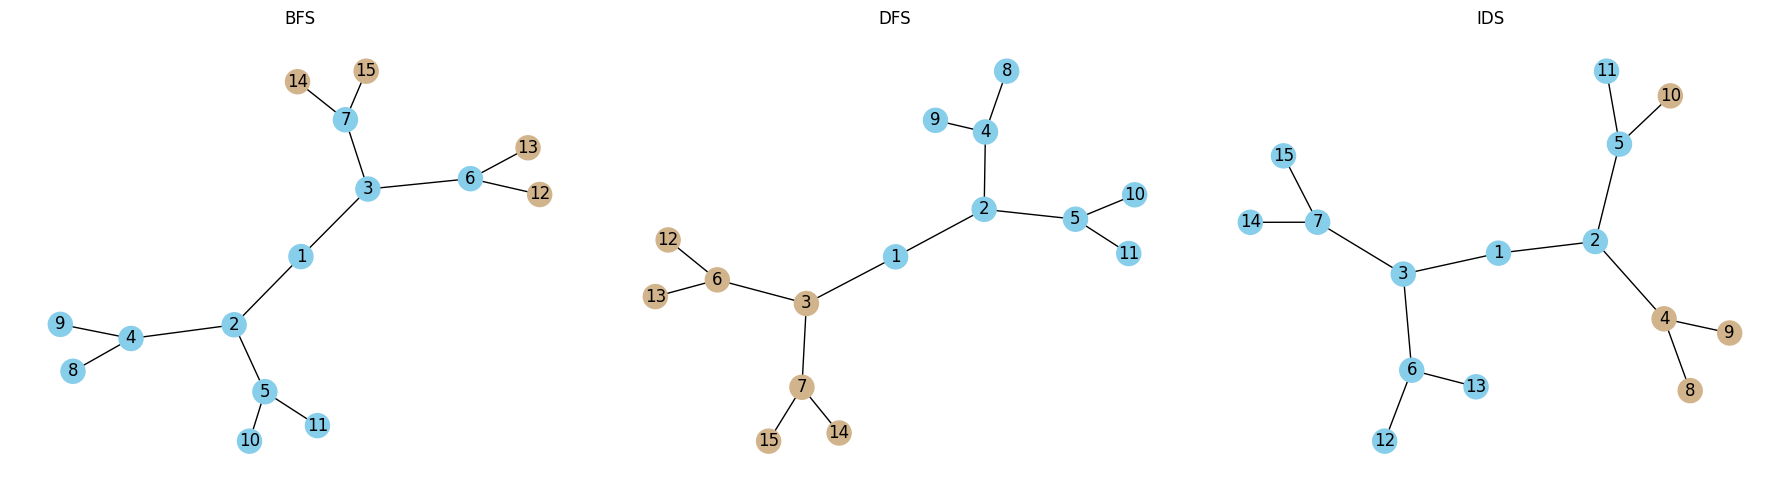

In [192]:
def main_nx() -> None:
    """Main function to execute graph searches and visualize results."""
    G = create_graph_nx()
    start_node = 1
    goal_node = 11
    max_depth = 5

    bfs_visited = bfs_nx(G, start_node, goal_node)
    dfs_visited = dfs_nx(G, start_node, goal_node)
    ids_visited = ids_nx(G, start_node, goal_node, max_depth) or []

    print(f"BFS: {bfs_visited}")
    print(f"DFS: {dfs_visited}")
    print(f"IDS: {ids_visited}")

    plot_graph_nx(G, bfs_visited, dfs_visited, ids_visited)

# Execute the main function
main_nx()

The implementation of the three search algorithms using the `networkx` graph representation is working correctly. And the order in which the nodes were visited is the following:

1. Breadth-first search: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
2. Depth-first search: 1, 2, 4, 8, 9, 5, 10, 11
3. Iterative deepening depth-first search: 1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 15

The behavior of the three search algorithms is as expected. We can see the sky bluenodes are the nodes visited by the three search algorithms while the brown nodes are not visited by the algorithms.
